# Support Vector Machines 

<br>
__Support Vector Machines (SVM)__ are a method that uses points in a transformed problem space that best separate classes into two groups.

<br>

Classification for multiple classes is then supported by a one-vs-all method.

In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. 

<br>

Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category 
or the other, making it a non-probabilistic binary linear classifier. 

<br>

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

The __advantages__ of support vector machines are:

    1. Effective in high dimensional spaces.
    2. Still effective in cases where number of dimensions is greater than the number of samples.
    3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The __disadvantages__ of support vector machines include:

    1. If the number of features is much greater than the number of samples, the method is likely to give poor performances.
    2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

## SVM General Explanation

<br>

We'll start by imagining a situation in which we want to seperate a training set with two classes (left picture). We have two classes in our set, blue and red. We plot them out in the feature space and we try to place a line that seperates both classes (middle picture).

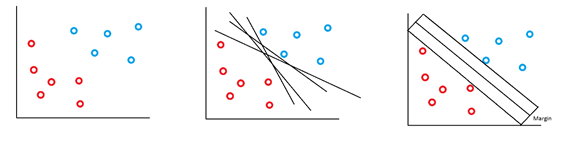

In [1]:
from IPython.display import Image
url = 'https://quantdare.com/wp-content/uploads/2016/09/SVM1.png'
Image(url, width = 1000, height = 1000)

From the image above we see that we have multiple ways of drawing this line (which we will call a hyperplane) that can seperate the classes completely. So which is the optimal line?

<br>

We decide that the optimal hyperplane that seperates these two classes is the one with the maximum margin between the two classes as seen in the right image above.

## Computing the Hyperplane

Start by defining the Hyperplane in this case with the equation of a line, where $\beta^{T}$ is the known weight vector and $\beta_{0}$ is the bias.

$$ f(x) = \beta_{0} + \beta^{T} x $$

We need to scale the weight vector and the bias, but we want to maximize the margin between the two classes. So we can set this as:

$$ |\beta_{0} + \beta^{T} x| = 1 $$

where $x$ symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point $x$ and the hyperplane $(\beta,\beta_{0})$ is:

$$\mathrm{distance} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||}.$$

In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

$$\mathrm{distance}_{\text{ support vectors}} = \frac{|\beta_{0} + \beta^{T} x|}{||\beta||} = \frac{1}{||\beta||}$$

Recall that the margin, here denoted as $M$, is twice the distance to the closest examples:

$$M = \frac{2}{||\beta||}$$

Finally, the problem of maximizing $M$ is equivalent to the problem of minimizing a function $L(\beta)$ subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples $x_{i}$.

Formally,

$$\min_{\beta, \beta_{0}} L(\beta) = \frac{1}{2}||\beta||^{2} \text{ subject to } y_{i}(\beta^{T} x_{i} + \beta_{0}) \geq 1 \text{ } \forall i$$
where yi represents each of the labels of the training examples.

This is a problem of Lagrangian optimization that can be solved using Lagrange multipliers to obtain the weight vector $\beta$ and the bias $\beta_{0}$ of the optimal hyperplane.

If we want to do non-linear classification we can employ the kernel trick. Using the kernel trick we can "slice" the feature space with a Hyperplane.

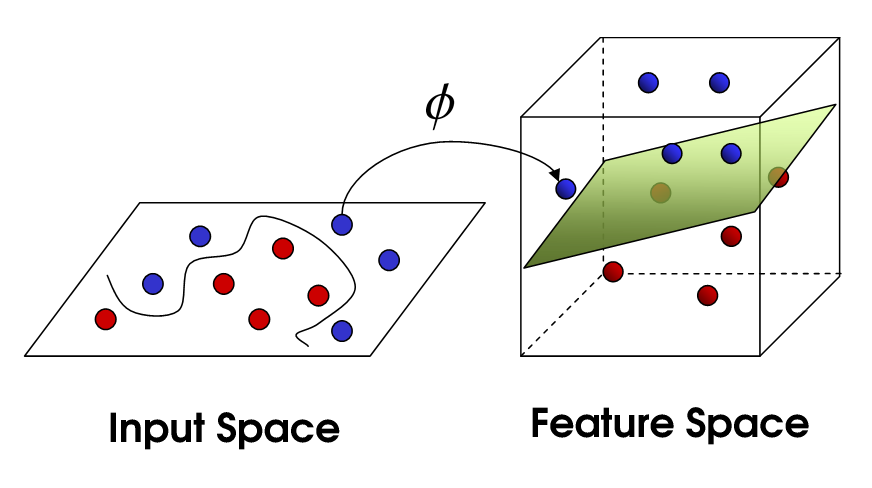

In [2]:
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

## SVM with SciKit Learn

As I have just worked with the Iris dataset from SciKits database, I will use SVM with this set.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

# Grab explanatory variable (X) and the resulting variable (Y)
X = iris.data
Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Support Vector Machine Imports
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [8]:
model.fit(X_train,Y_train)

SVC()

In [9]:
from sklearn import metrics

predicted = model.predict(X_test)
expected = Y_test

print (metrics.accuracy_score(expected,predicted))

0.9736842105263158


Looks like we have achieved a 97.4 % accuracy with Support Vector Classification.

<br>

Now that we've gone through a basic implementation of SVM we shall explore the various kernel types we can use for classification.

<br>

The we will explore two linear models, a __Gaussian Radial Basis Function__ , and a __SVC with a polynomial (3rd Degree) kernel__.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

    - LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.

    - LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [10]:
from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Basis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C, max_iter = 4000).fit(X,Y)

Now that we have fitted the four models, we will go ahead and begin the process of setting up the visual plots.

First we define a mesh to plot in. We define the max and min of the plot for the y and x axis by the smallest and larget features in the data set. We can use numpy's built in mesh grid method to construct our plot.

In [11]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [12]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

<ipython-input-13-35506c9f3ac1>:25: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
<ipython-input-13-35506c9f3ac1>:25: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
<ipython-input-13-35506c9f3ac1>:25: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)
<ipython-input-13-35506c9f3ac1>:25: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)


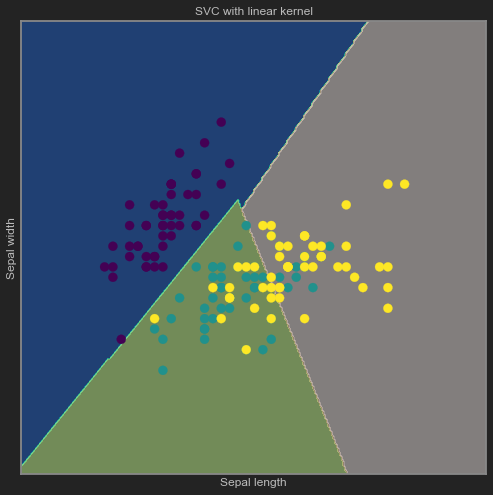

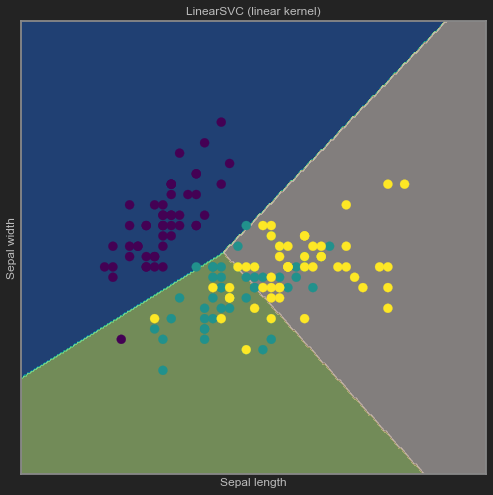

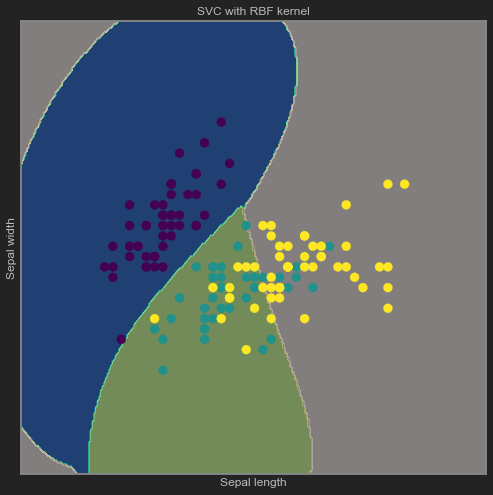

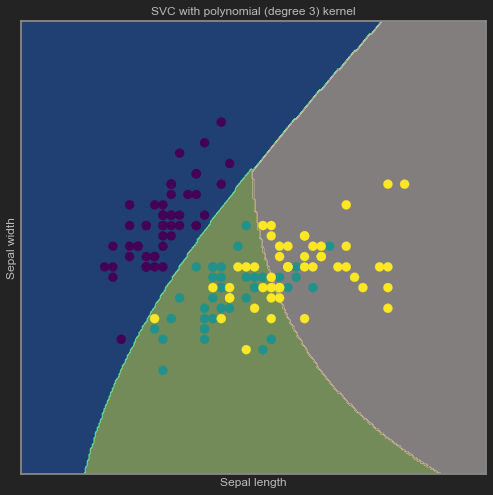

In [13]:
# Change Theme of plots for better visualization
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1, spines=True, gridlines='--')

# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(20,20))
    
    # Set the subplot position (Size = 2 by 2) position defined by i count
    plt.subplot(2, 2, i + 1)
    
    # Subplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, note the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()